<a href="https://colab.research.google.com/github/hyperkraz/MAT421/blob/main/HW12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HW12**

***Problem 4***

In [37]:
import numpy as np
import matplotlib.pyplot as plt

from functools import partial
from scipy.integrate import solve_ivp

def my_msd(t, S, m, c, k):
  dS = np.dot(np.array([[0, 1], [-k/m, -c/m]]), S)
  return dS


In [38]:
my_msd(0, [1, -1], 10, 1, 100)

array([-1. , -9.9])

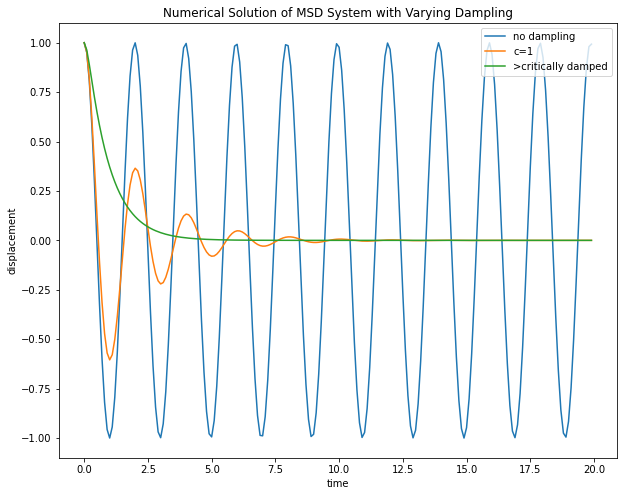

In [39]:
m = 1
k = 10
f = partial(my_msd, m=m, c=0, k=k)
t_e = np.arange(0, 20, 0.1)
sol_1=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

f = partial(my_msd, m=m, c=1, k=k)
sol_2=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

f = partial(my_msd, m=m, c=10, k=k)
sol_3=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

plt.figure(figsize = (10, 8))
plt.plot(sol_1.t, sol_1.y[0])
plt.plot(sol_2.t, sol_2.y[0])
plt.plot(sol_3.t, sol_3.y[0])
plt.title('Numerical Solution of MSD \
System with Varying Dampling')
plt.xlabel('time')
plt.ylabel('displacement')
plt.legend(['no dampling', 'c=1', \
           '>critically damped'], loc=1)

***Problem 5***

In [40]:
def my_forward_euler(ds, t_span, s0):
    if (len(t_span)<2):
      raise BaseException("length of t_span must be greater than 1")
    h=(t_span[-1]-t_span[0])/(len(t_span)-1)
    s=np.zeros((len(t_span)+1,1))
    s[0]=s0
    for i in range(0,len(t_span)):
      s[i+1]=s[i]+h*ds(t_span[i], s[i])
    t=t_span
    stemp=s.transpose()[0]
    s=np.delete(stemp,-1)
    return [t, s]

t_span = np.linspace(0, 1, 10)
s0 = 1

# Define parameters
f = lambda t, s: t*np.exp(-s)

t_eul, s_eul = my_forward_euler(f, t_span, s0)

print(t_eul)
print(s_eul)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[1.         1.         1.00454172 1.013584   1.02702534 1.04470783
 1.06642355 1.09192262 1.12092255 1.153118  ]


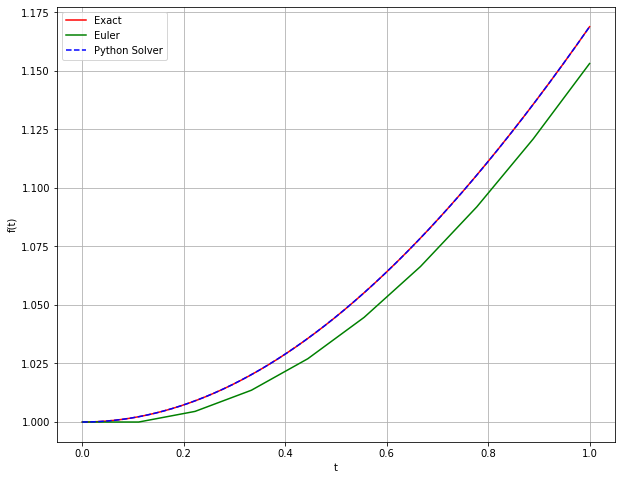

In [41]:
plt.figure(figsize = (10, 8))

# Exact solution
t = np.linspace(0, 1, 1000)
s = np.log(np.exp(s0) + (t**2-t[0])/2)
plt.plot(t, s, 'r', label='Exact')

# Forward Euler
plt.plot(t_eul, s_eul, 'g', label='Euler')

# Python solver
sol = solve_ivp(f, [0, 1], [s0], t_eval=t)
plt.plot(sol.t, sol.y[0], 'b--', \
         label='Python Solver')

plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc=2)
plt.show()

***Problem 6***

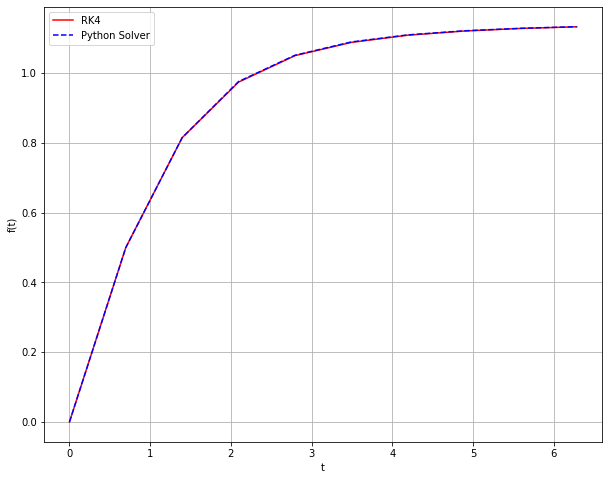

In [42]:
def myRK4(ds, t_span, s0):
    if (len(t_span)<2):
      raise BaseException("length of t_span must be greater than 1")
    h=(t_span[-1]-t_span[0])/(len(t_span)-1)
    s=np.zeros((len(t_span),1))
    s[0]=s0
    for i in range(0, len(t_span)-1):
      k1=ds(t_span[i], s[i])
      k2=ds(t_span[i]+(1/2)*h, s[i]+(1/2)*h*k1)
      k3=ds(t_span[i]+(1/2)*h, s[i]+(1/2)*h*k2)
      k4=ds(t_span[i]+h, s[i]+h*k3)
      s[i+1]=s[i]+(h/6)*(k1+2*k2+2*k3+k4)
    t=t_span
    s=s.transpose()[0]
    return [t, s]

f = lambda t, s: np.sin(np.exp(s))/(t+1)
t_span = np.linspace(0, 2*np.pi, 10)
s0 = 0

plt.figure(figsize = (10, 8))

# Runge-Kutta method
t, s = myRK4(f, t_span, s0)
plt.plot(t, s, 'r', label='RK4')

# Python solver
sol = solve_ivp(f, [0, 2*np.pi], [s0], t_eval=t)
plt.plot(sol.t, sol.y[0], \
         'b--', label='Python Solver')

plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc=2)
plt.show()